In [11]:
%pylab inline
from sklearn.cluster import AgglomerativeClustering

Populating the interactive namespace from numpy and matplotlib


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats

#strdata = pd.read_csv("/storage/mgymrek/ssc-imputation/pilot-haplotypes/atxn7_haplotypes.tab", sep="\t")
strdata = pd.read_csv("/storage/mgymrek/ssc-imputation/pilot-haplotypes/dmpk_haplotypes.tab", sep="\t")
#strdata = pd.read_csv("/storage/mgymrek/ssc-imputation/pilot-haplotypes/atxn7_haplotypes_fm.tab", sep="\t")
#snppos = [int(line.strip()) for line in open("/storage/mgymrek/ssc-imputation/pilot-haplotypes/atxn7_snppos.txt", "r").readlines()]

In [13]:
#strdata = strdata[strdata["STRallele"].apply(str)!="None"]
strdata = strdata.sort("STRallele")
strdata.head()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,sample-hap,STRallele,SNPhaplotype
87,SSC07130-hap2,17,1111100101011101011111010100111000111111011111...
115,SSC11346-hap2,17,1111100111011101011111010100111000111111011111...
111,SSC03093-hap2,17,0111111111111111111111111111111111111111110111...
109,SSC12888-hap2,17,1111100111011101011111010100111000111111011101...
219,SSC03078-hap2,17,1111100111011101011111010100111000111111011111...


In [14]:
# Get SNP-STR LD
#ld = {}
#for i in range(len(snppos)):
#    # Get list of SNP and STR alleles
#    snp_alleles = strdata[strdata["STRallele"].apply(str)!="None"].apply(lambda x: int(x["SNPhaplotype"][i]), 1)
#    str_alleles = strdata[strdata["STRallele"].apply(str)!="None"]["STRallele"].apply(int)
#    r2 = scipy.stats.pearsonr(snp_alleles, str_alleles)[0]**2
#    ld[snppos[i]] = r2

In [15]:
#ld

In [16]:
# Load snp data
#gwas = pd.read_csv("/storage/mgymrek/atxn7/atxn7_snps.tab", sep="\t")
#gwas.head()

In [17]:
def ClusterRows(hapmatrix, nclusters=6):
    c = AgglomerativeClustering(n_clusters=min([hapmatrix.shape[0], nclusters]))
    labels = c.fit_predict(hapmatrix)
    idx = sorted([(labels[i], i) for i in range(hapmatrix.shape[0])])
    neworder = [item[1] for item in idx]
    return hapmatrix[neworder,:], neworder, [item[0] for item in idx]

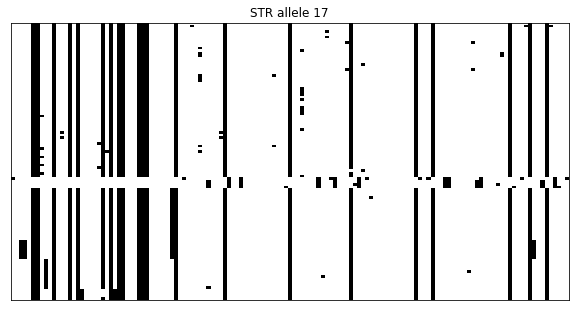

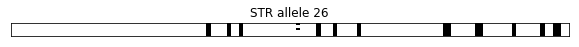

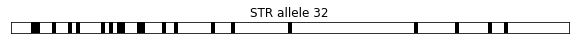

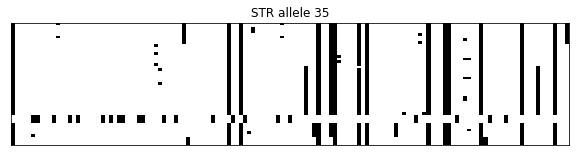

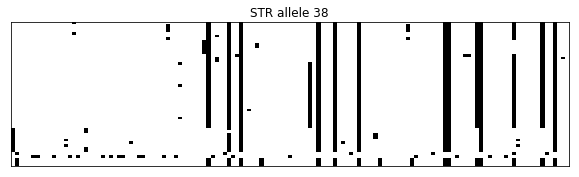

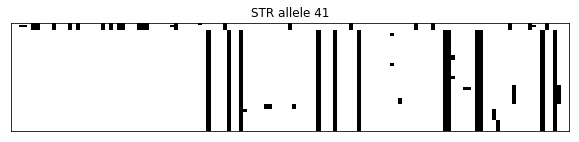

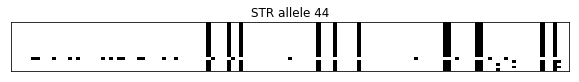

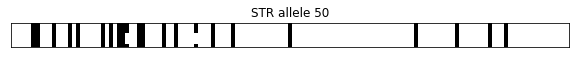

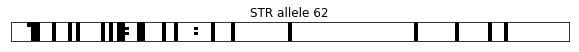

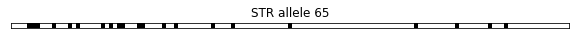

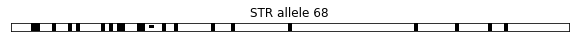

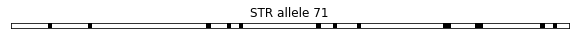

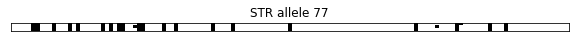

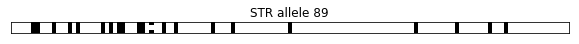

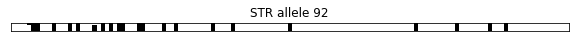

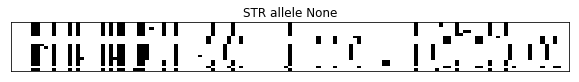

In [18]:
# SNP haplotypes per STR allele
for allele in sorted(list(set(strdata["STRallele"].values))):
    d = strdata[strdata["STRallele"]==allele]
    if d.shape[0] <= 1: continue
    hapmatrix = np.zeros((d.shape[0], len(d.SNPhaplotype.values[0])))
    for i in range(d.shape[0]):
        hapmatrix[i,:] = [int(item) for item in list(d.SNPhaplotype.values[i])]
    # Cluster rows
    hapmatrix_cl = ClusterRows(hapmatrix)[0]
    fig = plt.figure()
    fig.set_size_inches((10, d.shape[0]*0.05))
    ax = fig.add_subplot(111)
    ax.imshow(1-hapmatrix_cl, cmap='Greys', aspect="auto", extent=(0, hapmatrix_cl.shape[1], 0, hapmatrix_cl.shape[0]))
    ax.set_yticks([]);
    ax.set_yticklabels([]);
    ax.set_xticks([]);
    ax.set_xticklabels([]);
    ax.set_title("STR allele %s"%allele)

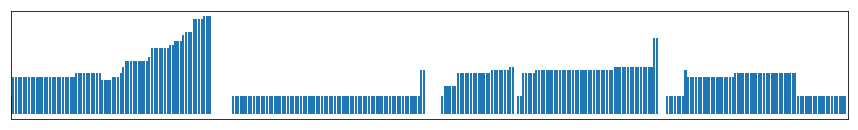

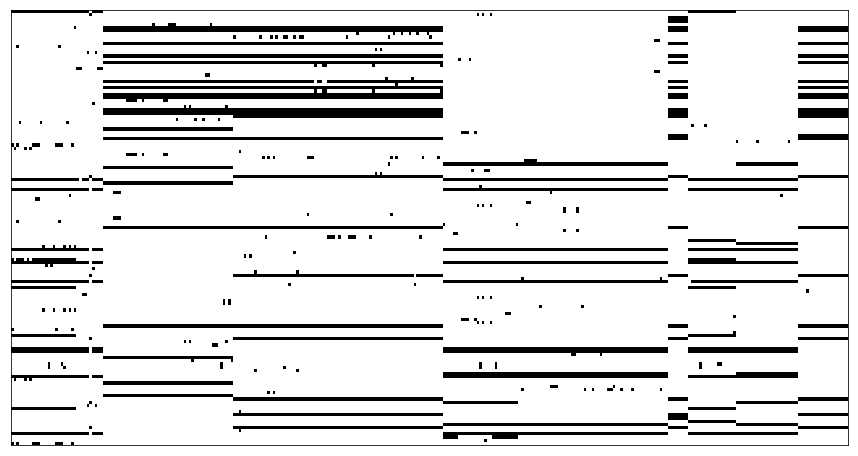

In [19]:
NCLUST=10
# all SNP haplotypes, annotate STR allele
d = strdata
hapmatrix = np.zeros((d.shape[0], len(d.SNPhaplotype.values[0])))
for i in range(d.shape[0]):
    hapmatrix[i,:] = [int(item) for item in list(d.SNPhaplotype.values[i])]
hapmatrix_cl, neworder, clusterids = ClusterRows(hapmatrix, nclusters=NCLUST)
def GetInt(x):
    try:
        return int(x)
    except: return 0 # "None" in allele column
stralleles = [GetInt(x) for x in np.array(d["STRallele"])[neworder]]

# To the top, plot str allele sizes
fig = plt.figure()
fig.set_size_inches((15, 2))
ax = fig.add_subplot(111)
ax.bar(range(len(stralleles)), stralleles)
ax.set_yticks([]);
ax.set_yticklabels([]);
ax.set_xticks([]);
ax.set_xticklabels([]);
ax.set_xlim(left=0, right=len(stralleles))
ax.set_ylim(bottom=min(stralleles)-5, top=max(stralleles)+5)

# Now print snp haplotypes (transpose)
fig = plt.figure()
fig.set_size_inches((15, 8))
ax = fig.add_subplot(111)
ax.imshow((1-hapmatrix_cl).transpose(), cmap='Greys', aspect="auto", extent=(0, hapmatrix_cl.shape[1], 0, hapmatrix_cl.shape[0]))
ax.set_yticks([]);
ax.set_yticklabels([]);
ax.set_xticks([]);
ax.set_xticklabels([]);